In [3]:
import tensorflow as tf
print(tf.__version__)
hello = tf.constant("Hello, Tensorflow!")
# tensorflow     constant, variables, placeholder
sess = tf.Session()
print(hello) # tensorflow의 데이터는 직접 확인이 불가
print(sess.run(hello)) # numpy데이터로 변경ㅌ ㅊ

1.14.0
Tensor("Const_2:0", shape=(), dtype=string)
b'Hello, Tensorflow!'


In [4]:


x = tf.constant(35, name='x') 
# 이름을 주는 이유 : 1.모델의 그래프 구조에서 확인하기 위해서 
#                   2. 모델을 그대로 저장할 때, 메모리 위치를 확인하기 위해서
# 모델을 만들면 가중치가 메모리에 저장됨 -> 다음에 로딩할 때, 같은 위치에 저장된다는 보장 없음
# -> name을 지정하여, 찾음

y = tf.Variable(x+5, name = 'y') # 변수가 있는 경우 => 반드시 초기화 필요
print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [5]:
model = tf.global_variables_initializer() # Variable 변수 초기화
# 모델 만드는 과정 


# 학습 과정
with tf.Session() as session:  # with에서는 해당 작업이 끝나면 메모리에서 삭제됨
    session.run(model)
    print(session.run(y))

40


In [6]:
# pandas에서 데이터를 초기화 시킬 때, list나 dict 이용했음
# tensorflow도 마찬가지

a = tf.constant([1,2,3], name = 'a')  # GPU 공간에 데이터 저장( 지금은 CPU에 하는 중 )
b = tf.constant([4,5,6], name = 'b')
add_op = a+b

with tf.Session() as session:
    print(session.run(add_op))
# ==> 배열연산( 요소끼리 더함 )

[5 7 9]


In [8]:

a = tf.placeholder(tf.int16)   # 데이터없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add,mul)
# ==> 자료구조가 Graph로 구성됨  == 골격(구조) 형성

In [11]:
with tf.Session() as sess:  # session 연결
    #print("feed 변수합: %i" % sess.run(add, feed_dict={a:2, b:3}))# 데이터 주입 호출
    #print("feed 변수곱: %i" % sess.run(mul, feed_dict={a:2, b:3}))
    print("feed 변수곱: %i" % sess.run(total, feed_dict={a:2, b:3})) 
    # add,mul을 호출하지 않아도 Graph로 연결되어 있기 때문에 자동으로 호출되고 계산됨

feed 변수곱: 30


In [15]:
#참고
input_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)

y = x * 2


sess = tf.Session()

result = sess.run(y,feed_dict={x:input_data})


print(result)

[ 2.  4.  6.  8. 10.]


In [17]:
#참고
input_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)

W = tf.Variable([2],dtype=tf.float32)

y = W*x


sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)

result = sess.run(y,feed_dict={x:input_data})


print(result)



[ 2.  4.  6.  8. 10.]


In [18]:
matrix1 = tf.constant([[3.,3.]]) # 1x2
matrix2 = tf.constant([[2.],[2.]]) # 2x1
product = tf.matmul(matrix1, matrix2)  #matmul = matrix multiply

with tf.Session() as sess:  # 실행부
    result = sess.run(product)
    print(result)

[[12.]]


## 초기화

In [19]:


zeros = tf.zeros([2,2])  # 모든 변수 0
ones = tf.ones([6])  # 모든 변수 1
# 균등분포
uniform = tf.random_uniform([3,3,3], minval = 0.0, maxval = 10)
# 정규분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev = 2.0)
# 표준편차 2배수 내의 것으로 초기화
trunc = tf.truncated_normal([2,2], mean = 5.0, stddev = 1.0)

random_var  = tf.Variable(tf.truncated_normal([2,2]))

In [30]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
print(sess.run(trunc))
print("변수초기화", sess.run(random_var))

[[6.021582  4.951728 ]
 [3.1956623 4.134124 ]]
변수초기화 [[-1.4484677 -1.1651886]
 [ 0.6684664  1.0616907]]


In [34]:
my_tensor = tf.constant(0, shape=[6,2])  # 6x2 행렬, 상수화
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) # class
print(my_static_shape) # shape는 run 사용없이 확인 가능
print(sess.run(my_tensor))

# 전치
my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())
print(sess.run(my_tensor_transposed))

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
(2, 6)
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]]


## 대화형 세션

In [38]:
tf.InteractiveSession()  # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval())  # run

[0. 0.]


In [39]:
def showvalue(t) :
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() #chaining
    print(t.eval())
    sess.close()

In [44]:
c2, c3 = tf.constant([1.2,5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.Variable([2.3,4.5]) , tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2]))  # 여러 개가 가능하도록 add_n 사용
print("=======")
showvalue(tf.add_n([c3,v3,v3]))

[ 3.5 10.1]
[-8  5 17]


## 다차방정식 계산

In [45]:
# 2x + y + z = 1
# 4x + 3y + 4z = 2
# -4x + 2y + 2z = -6
# A dot x = [1,2,-6]  # 행렬 나누기 => 역행렬
#       y
#       z

In [50]:
sess =tf.Session()
x = tf.constant([2.0, 1.0, 1.0,
                 4, 3, 4,
                 -4, 2, 2], shape = [3,3])
print(sess.run(x))
y = tf.constant([1.0,2,-6], shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [55]:
z = tf.matrix_solve(x,y)  # x의 역행렬을 구해서 y와 곱함
result = sess.run(z)
print("계수 : \n", result)
print(sess.run(z))

# 검산
print(sess.run(tf.matmul(x,z)))

계수 : 
 [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [58]:
x_1 = tf.matrix_inverse(x)  # x의 역행렬
z = tf.matmul(x_1,y)  #x의 역행렬과 y의 행렬곱
# matrix_solve와 같음

print("해 : ",sess.run(z))

해 :  [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [67]:
# 특이행렬분해( singular value decomposition (SVD))
# - 정방행렬이 아니라도 가능함

# PCA할 때 - 고유값분해 eigenvalue + eigenvector : 정방행렬, 


a = tf.constant([1,2,3,4,5,6], shape = [2,3])
a = tf.to_float(a)
s, u, v = tf.svd(a)
# s : sigula value
# u : left singular value
# v : right
# 차수가 큰 순서대로 옴
# 행과 열의 특징을 별도로 뽑음
# truncate : 
# => u(2x2), s(1x2), v(3x2)
print(sess.run(s))
print("====")
print(sess.run(u))
print("====")
print(sess.run(v))

[9.508034   0.77286935]
====
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
====
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [64]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal)  # 대각행렬  one-hot-encoding에서 많이 사용
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [65]:
print(sess.run(tf.diag_part(dia)))  # 대각선 요소만 뽑음
print(sess.run(tf.trace(dia)))  # 대각선 요소의 합

[1 2 3 4]
10


### 행렬곱

In [69]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape= [3,2])
c = tf.matmul(a,b)
print(sess.run(a))
print(sess.run(b))
sess.run(c)

[[1 2 3]
 [4 5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]


array([[ 58,  64],
       [139, 154]])

In [79]:

a = tf.constant(np.arange(1,13, dtype=np.int32),
               shape = [2,2,3]) #행열을 중심하고 데이터를 표현
print(sess.run(a))
b = tf.constant(np.arange(13,25, dtype=np.int32),
               shape = [2,3,2])
print(sess.run(b))
c = tf.matmul(a,b)  # 뒤에 있는 행,열 부분만 보고 행렬곱 가능한지 판단(2x3 , 3x2 => 가능)
sess.run(c)  # 2x2x2


[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [82]:
a = tf.constant(np.arange(1,25, dtype=np.int32),
               shape = [2,2,2,3]) #행열을 중심하고 데이터를 표현
print(sess.run(a))
b = tf.constant(np.arange(25,49, dtype=np.int32),
               shape = [2,2,3,2])
print("=========")
print(sess.run(b))
print("=========")
c = tf.matmul(a,b)  # 뒤에 있는 행,열 부분만 보고 행렬곱 가능한지 판단(2x3 , 3x2 => 가능)
sess.run(c)  # 2x2x2


[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [91]:
# a를 제곱하려면 : 자기자신을 제곱하려면 전치해야됨
# => 다차원에서 행,열 부분만 전치하고, 다른 차수는 고려 x

d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))  # 순서
print(sess.run(d))
print("============================")
e = tf.matmul(a,a,transpose_b = True) # a,a를 곱하되, b요소(두번째)는 전치
print(sess.run(e))

# ==> d,e 같은 값

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]
[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


In [100]:
x = tf.constant([[[1,2,3],   # 2x2x3
                 [4,5,6]],
                [[7,8,9],
                [10,11,12]]])

print(sess.run(tf.shape(x)))
print("======================")
print(sess.run(tf.transpose(x))) # 3x2x2 : [2,1,0]  ==> default
print("======================")
print(sess.run(tf.transpose(x,perm=[0,2,1]))) #2x3x2

[2 2 3]
[[[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]

 [[ 3  9]
  [ 6 12]]]
[[[ 1  4]
  [ 2  5]
  [ 3  6]]

 [[ 7 10]
  [ 8 11]
  [ 9 12]]]


In [127]:
t = [1,2,3,4,5,6]
t = tf.reshape(t, [1,2,1,3,1,1])  # 6차원으로 확대
print(sess.run(t))
print(sess.run(tf.shape(t)))
print("======================")
print("차원의 수를 축소할 때",sess.run(tf.shape(tf.squeeze(t))))
# 요소 수가 1개인 차원을 없앰

[[[[[[1]]

    [[2]]

    [[3]]]]



  [[[[4]]

    [[5]]

    [[6]]]]]]
[1 2 1 3 1 1]
차원의 수를 축소할 때 [2 3]


In [128]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor, [2,-1])))  # - 의미 : 계산해서 채워라(2,6)
print("======================")
print(sess.run(tf.reshape(tensor, [-1,6])))  # -1,6 -> 2,6
print("======================")
print(sess.run(tf.reshape(tensor,[2,-1,3]))) # 2,-1,3 -> 2,2,3

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [129]:
# t : 1,2,1,3,1,1
# -> 1,1,2,1,3,1,1
print(tf.expand_dims(t,0)) 
# ==> 차원확대하여 행렬곱 연산을 하기 위함

Tensor("ExpandDims_4:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [138]:
# padding : 충전재

t = [[1,2,3],[4,5,6]] # ==> 4x7
paddings = [[1,1],[2,2]] #행을 위에 1개, 밑에 1개 / 열을 오른쪽 2개 왼쪽 2개
print(sess.run(tf.pad(t,paddings,'CONSTANT')))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [141]:

paddings = [[1,1],[1,1]]  # ==> 4x5
print(sess.run(tf.pad(t, paddings, "REFLECT"))) # 반사 시켜 채움
print("======================")
print(sess.run(tf.pad(t,paddings,"SYMMETRIC"))) # 끝을 확장

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]
[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


100

# 다차 방정식의 해 구하는 방법
- 무작위 대입법
- 역행렬을 구함
- 입,출력 데이터만 있을 때 : 계수결정( 가중치 학습을 통해서 학습 )

# 텐서플로우 기본 프로세스

-데이터 생성(+minibatch) -> 예측 함수 -> loss function 
-> optimizer -> 데이터 주입(feeding)

In [148]:
# 데이터로부터 규칙을 발견 -> 분류와 예측을 하기 위해서

import numpy as np
import tensorflow as tf
# 데이터 생성 => minibatch => feeding ( 여기서는 생성만 )
x_data = np.random.rand(100).astype(np.float32)

y_data = x_data *0.1 + 0.3 # 선형 방정식
len(y_data)



100

In [149]:
# ==> 어떻게 0.1과 0.3을 알아내는가(W , b)

# 가중치와 바이어스
# 가중치 : 설명력?
# bias : activation을 결정 
  # ex) bias가 1일때, 1을 넘으면 활성, 넘지 않으면 비활성
# 가중치에는 꼭 bias가 하나씩 결합함


W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 균등분포
b = tf.Variable(tf.zeros([1]))  # 바이어스
sess = tf.Session()
y = W*x_data + b

In [153]:
# loss function: MSE  : 2차원인 경우는 포물선을 그리고, 최적점은 1개

loss = tf.reduce_mean(tf.square(y-y_data)) #(예측치-실제값)**2
#reduce_mean : 전부 더해서 평균

# 경사하강법 optimizer
# 기울기(미분) 이용해서 최적점 발견
# 기울기가 -  : 가중치에 차를 더해주고
# 기울기가 +  : 기중치에 감하는 연산
optimizer = tf.train.GradientDescentOptimizer(0.5) # 0.5 : learning rate
train =  optimizer.minimize(loss) #loss함수를 최적화하는 값을 찾는것

In [154]:
init = tf.global_variables_initializer() # 세션을 실행하기전(run하기 전)
sess.run(init)

In [156]:
for step in range(501) :  #200번 회전
    sess.run(train)  
    # Graph로 다른 연산이 연결되어 있기 때문에, train만 호출 가능
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [0.09999683] [0.30000174]
20 [0.09999906] [0.30000052]
40 [0.09999973] [0.30000016]
60 [0.0999999] [0.30000007]
80 [0.0999999] [0.30000007]
100 [0.0999999] [0.30000007]
120 [0.0999999] [0.30000007]
140 [0.0999999] [0.30000007]
160 [0.0999999] [0.30000007]
180 [0.0999999] [0.30000007]
200 [0.0999999] [0.30000007]
220 [0.0999999] [0.30000007]
240 [0.0999999] [0.30000007]
260 [0.0999999] [0.30000007]
280 [0.0999999] [0.30000007]
300 [0.0999999] [0.30000007]
320 [0.0999999] [0.30000007]
340 [0.0999999] [0.30000007]
360 [0.0999999] [0.30000007]
380 [0.0999999] [0.30000007]
400 [0.0999999] [0.30000007]
420 [0.0999999] [0.30000007]
440 [0.0999999] [0.30000007]
460 [0.0999999] [0.30000007]
480 [0.0999999] [0.30000007]
500 [0.0999999] [0.30000007]


### placeholder(주입변수) 사용 


In [159]:

x = tf.placeholder(tf.float32, name = 'x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b = tf.Variable(tf.zeros([1]))  

sess = tf.Session()

y_model = W*x + b

loss = tf.reduce_mean(tf.square(y_model-y)) 

optimizer = tf.train.GradientDescentOptimizer(0.5) 
train =  optimizer.minimize(loss)

init = tf.global_variables_initializer() 
sess.run(init)


for step in range(201) :  #200번 회전
    sess.run(train,{x:x_data, y:y_data})  
    # Graph로 다른 연산이 연결되어 있기 때문에, train만 호출 가능
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [0.20595704] [0.33823594]
20 [0.11942928] [0.28935048]
40 [0.10577547] [0.29683438]
60 [0.10171682] [0.299059]
80 [0.10051035] [0.2997203]
100 [0.10015172] [0.29991686]
120 [0.10004508] [0.2999753]
140 [0.10001341] [0.29999268]
160 [0.10000399] [0.29999784]
180 [0.10000117] [0.2999994]
200 [0.10000035] [0.29999983]


In [162]:
predicted = sess.run(y_model, {x:[i for i in range(100)]})

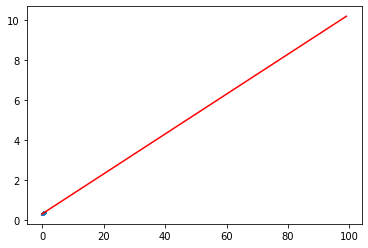

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', markersize=2)
plt.plot(predicted,'r')
plt.show()

In [172]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [173]:
sess = tf.Session()
x_vals = np.array([1.,3.,5.,7.,9.])
y_vals = np.array([1.,3.,5.,7.,9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data,y_data)
for x_val in x_vals : 
    print(sess.run(prod, feed_dict={x_data:x_val,y_data: y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [174]:
merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard1_logs/'):
    os.makedirs('c://tmp/tensorboard1_logs')

my_writer = tf.summary.FileWriter('c://tmp/tensorboard1_logs',
                                 sess.graph)

In [181]:
import numpy
rng = numpy.random

# 상수화할 때 좋은 점 : 여러 군데에서 쓰일 때, 상수 값만 바꾸면 다 바꿀 수 있음
learning_rate = 0.01
training_epochs = 4000
display_step = 50


train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [191]:

# data point : 관측치(행)

n_samples = train_X.shape[0]  #차수 : 행(3,4) : 인덱스 접근
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(), name = 'weight')  # 설명력
b = tf.Variable(rng.randn(), name = 'bias')    # activation
activation = tf.add(tf.multiply(X,W), b)  # 수식 : y = ax + b
cost = tf.reduce_sum(tf.pow(activation-Y,2))/(2*n_samples)  # activation(예측치) - Y(실제값)      #pow : (x,3) = x**3
# minibatch size를 고려해서 2로 나눔


# optimizer : 역전파를 수용함
# optimizer도 hyperparameter가능 ( 유저가 결정하는 것이 아님 )
# learning rate : hyperparameter
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)   # cost가 최소값이 되는 곳을 찾아감


init = tf.initialize_all_variables()



# ==> Graph 정의 : node(연산) + edge( 데이터 전달 : tensor(배열+행렬))

Epoch :  0001 cost= 9.378128052 W= -0.2866783 b= 0.027164744
Epoch :  0051 cost= 0.102521963 W= 0.33905947 b= 0.15785474
Epoch :  0101 cost= 0.099567853 W= 0.3337386 b= 0.19613333
Epoch :  0151 cost= 0.096955158 W= 0.32873404 b= 0.2321354
Epoch :  0201 cost= 0.094644412 W= 0.3240272 b= 0.26599625
Epoch :  0251 cost= 0.092600748 W= 0.31960025 b= 0.2978434
Epoch :  0301 cost= 0.090793334 W= 0.31543666 b= 0.32779592
Epoch :  0351 cost= 0.089194864 W= 0.31152064 b= 0.35596743
Epoch :  0401 cost= 0.087781191 W= 0.30783764 b= 0.38246337
Epoch :  0451 cost= 0.086530961 W= 0.3043734 b= 0.40738395
Epoch :  0501 cost= 0.085425332 W= 0.3011155 b= 0.43082163
Epoch :  0551 cost= 0.084447563 W= 0.29805118 b= 0.45286602
Epoch :  0601 cost= 0.083582900 W= 0.29516912 b= 0.4735993
Epoch :  0651 cost= 0.082818292 W= 0.2924585 b= 0.49309915
Epoch :  0701 cost= 0.082142182 W= 0.2899092 b= 0.5114383
Epoch :  0751 cost= 0.081544295 W= 0.28751168 b= 0.5286868
Epoch :  0801 cost= 0.081015572 W= 0.28525642 b= 0

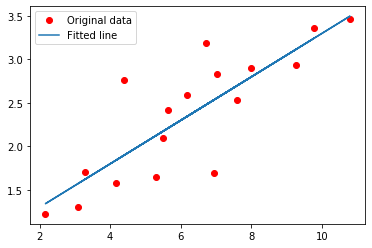

In [192]:
# 전제조건 : GPU가 존재한다. => CPU와 연결하기 위해 Session으로 연결

with tf.Session() as sess:  # 실행부
    sess.run(init)
    for epoch in range(training_epochs) : # 세대
        for (x,y) in zip(train_X, train_Y):   # 데이터를 1개씩 feeding
            sess.run(optimizer, feed_dict={X:x, Y:y})
        if epoch % display_step ==0:  # 비용함수 : 감소해야됨 : 우하향 곡선  
            print("Epoch : ", '%04d' % (epoch+1), 'cost=',
                 '{:.9f}'.format(sess.run(cost, feed_dict={X:train_X, Y:train_Y})),
                 'W=', sess.run(W), 'b=', sess.run(b))
    print('최적화 종료')
    print("cost = ", sess.run(cost, feed_dict={X:train_X, Y:train_Y}),
         'W=',sess.run(W), 'b=',sess.run(b))
    plt.plot(train_X, train_Y,'ro', label='Original data')
    
    #예측한 결과값 출력
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b),
            label='Fitted line')
    plt.legend()
    plt.show()

In [193]:
# tensor를 직접 시각화 하는 것이 불가능 => numpy 포멧으로 변경

import tensorflow as tf
def run_variable(variable) :
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [196]:
my_distribution = tf.random_uniform((600,400), seed=42)
uniform = run_variable(my_distribution)

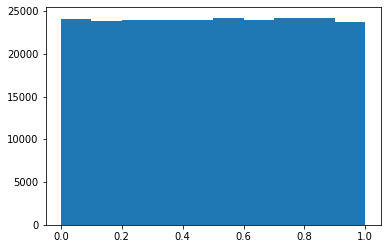

In [197]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten())  # 데이터 메모리 저장 : 1차원으로 저장됨 => flatten : 차수를 무시하고 1차원으로 데이터를 만듬
plt.show()

# ==> 데이터 개수에 따라 균등분포를 이루기도하고, 안이루기도함( 600,400개 / 6,4개 )

## activation 함수 : 회귀인가 분류인가 결정
- 비선형 맵핑 ( 선형대수 -> 비선형 문제로 변경 )
- 가중치를 깊게하고, activation 함수 맵핑으로 XOR 문제를 해결
- 한 번 정의된 변수를 다시 쓸 수 없어서 reset 필요

In [256]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()

x_vals = np.linspace(start=-10., stop = 10., num = 100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[-0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[-0.9999546  -0.99994444 -0.999932   -0.99991677 -0.99989814 -0.99987534
 -0.99984743 -0.99981327 -0.99977147 -0.99972031 -0.99965769 -0.99958106
 -0.99948727 -0.99937248 -0.999232   -0.99906006 -0.99884964 -0.9985921
 -0.99827691 -0.99789116 -0.99741905 -0.99684124 -0.99613408 -0.99526861
 -0.99420938 -0.99291301 -0.99132643 -0.98938465 -0.98700817 -0.98409965
 -0.98053999 -0.97618343 -0.97085155 -0.96432601 -0.95633957 -0.94656519
 -0.9346026  -0.9199619  -0.90204355 -0.88011378 -0.85327452 -0.82042669
 -0.78022512 -0.73102351 -0.67080701 -0.59710968 -0.50691352 -0.3965249
 -0.26142329 -0.0960761   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.

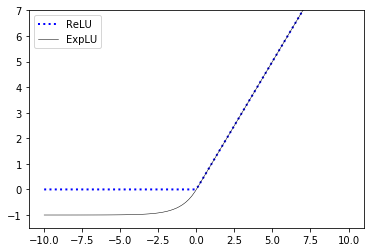

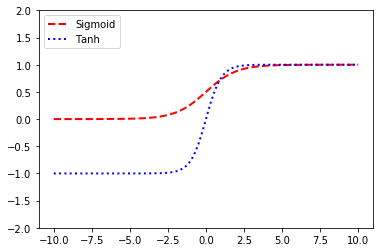

In [257]:
print(sess.run(tf.nn.relu([-3.,3.,10.])))  # relu를 가장 많이 씀   0~무한대
y_relu = sess.run(tf.nn.relu(x_vals))
print(sess.run(tf.nn.sigmoid([-1.,0.,1.]))) # 0 ~ 1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
print(sess.run(tf.nn.tanh([-1.,0.,1.])))  # -1 ~ 1
y_tanh = sess.run(tf.nn.tanh(x_vals))
print(sess.run(tf.nn.elu([-1.,0.,1.]))) # -1 ~ 무한대 (relu의 수정본)
y_elu = sess.run(tf.nn.elu(x_vals))
print(y_elu)
print(sess.run(tf.nn.softplus([-1.,0.,1.])))  # 각진 단점 보완
y_softplus = sess.run(tf.nn.softplus(x_vals))
print(y_softplus)
plt.plot(x_vals, y_relu,'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_elu,'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

In [258]:
ops.reset_default_graph()  # 그래프 초기화
sess = tf.Session()   
tf.set_random_seed(5)  # tf에서 시드의 초기값
np.random.seed(42)  # np에서 시드값
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))  # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))  # bias
a2 = tf.Variable(tf.random_normal(shape =[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.1,500) # 500개 데이터

# None : 사이즈를 fix하지 않고 입력데이터로부터 계산
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)  # => [None,1] : 행데이터로 생성

In [252]:

# y = ax + b => sigmoid ==> 0~1 사이값으로 맵핑
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1), b1))

# 0~ 무한대 값으로 맵핑
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))

# 0.75로 수렴과정
# loss함수로 MSE사용
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print("\n Sigmoid And Relu 함수의 최적화 : 0.75")


 Sigmoid And Relu 함수의 최적화 : 0.75


In [253]:
loss_vec_sigmoid = []  # loss값을 저장
loss_vec_relu = []

In [254]:
for i in range(500):
    # 500개에서 50개를 랜덤으로 초이스
    rand_indices = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_indices]]) # 입력데이터의 모양을 맞추기 위해 전치
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals})
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    if i%50 ==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) +'\t' 'relu = ' + str(np.mean(relu_output)))
        
# 0.75로 수렴하는 과정

sigmoid = 0.12655206	relu = 2.0227606
sigmoid = 0.17863758	relu = 0.7530296
sigmoid = 0.24769813	relu = 0.7492897
sigmoid = 0.3446748	relu = 0.7499546
sigmoid = 0.4400661	relu = 0.7539999
sigmoid = 0.5236898	relu = 0.754772
sigmoid = 0.58373857	relu = 0.7508698
sigmoid = 0.62733483	relu = 0.7470234
sigmoid = 0.6549499	relu = 0.75180537
sigmoid = 0.67452586	relu = 0.75470716


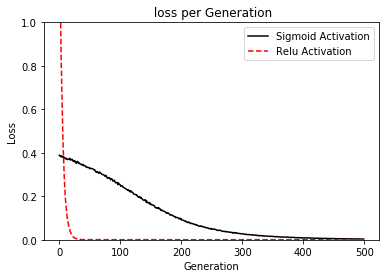

In [255]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 

[0.38889316,
 0.38548774,
 0.3862134,
 0.3812936,
 0.3858303,
 0.38107356,
 0.38052392,
 0.3819474,
 0.3787118,
 0.375593,
 0.37223816,
 0.37553516,
 0.37290394,
 0.36882088,
 0.37019473,
 0.37077773,
 0.37100115,
 0.37494048,
 0.3667002,
 0.37001646,
 0.36850762,
 0.3701268,
 0.3634055,
 0.3613476,
 0.36517018,
 0.35810307,
 0.36124787,
 0.36007816,
 0.3510973,
 0.35716385,
 0.36048096,
 0.35664296,
 0.3509722,
 0.35300702,
 0.349132,
 0.3480185,
 0.34806633,
 0.34403458,
 0.34403512,
 0.34677094,
 0.3402087,
 0.3418249,
 0.34067354,
 0.33949098,
 0.33448315,
 0.3331768,
 0.33448142,
 0.33181778,
 0.33283454,
 0.33106777,
 0.32670236,
 0.32914054,
 0.32901487,
 0.32762608,
 0.32711732,
 0.32626396,
 0.3237256,
 0.32231152,
 0.32214382,
 0.31570446,
 0.31217918,
 0.31084415,
 0.31422755,
 0.31238654,
 0.30718315,
 0.30613002,
 0.3118189,
 0.30828202,
 0.3070591,
 0.3043349,
 0.30137736,
 0.2999369,
 0.29949915,
 0.2978524,
 0.2967494,
 0.291713,
 0.29554385,
 0.29477572,
 0.28612295,
 